# Projekt z programowania probabilistycznego

Marcin Grzyb, Paweł Gałka

# Dataset used

dataframe 14.csv

# Environment prepare & data load

In [30]:
# Prepare env
!pip install arviz 
!pip install 'pymc3==3.8'

In [64]:
# Import test data
%matplotlib inline
import numpy as np
import theano
import theano.tensor as tt
import pymc3 as pm
import arviz
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

pd.set_option('display.max_rows', 300)

!rm -rf computational_intelligence_data
!git clone https://github.com/pawelgalka/computational_intelligence_data.git

Running on PyMC3 v3.8
Cloning into 'computational_intelligence_data'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 128 (delta 10), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (128/128), 3.65 MiB | 5.15 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [89]:
# Unpack data
import pandas as pd
import numpy as np
data_path = '/content/computational_intelligence_data/dataframe 14.csv'
headers = [*pd.read_csv(data_path, nrows=1)]

# Drop unnamed column
dataframe = pd.read_csv(data_path, usecols=[c for c in range(1,len(headers))])
print(dataframe)


      movie  person  genre       like
0       141      19      3  -7.249904
1       144       3      1   2.777657
2       146      11      0  -8.562494
3        56       2      2  -5.836700
4       166      15      1  -3.037239
...     ...     ...    ...        ...
2495     82       8      4  -1.305411
2496     58      15      2  -2.904646
2497    105       5      3 -12.059268
2498    191      21      1  -0.187069
2499    133       7      4  -7.919099

[2500 rows x 4 columns]


In [0]:
# Model commmons

n_genres = 5
n_people = 25
n_movies = 200

niter = 5000
tune_coeff = 1000
target_accept_coeff = .9

movie_idx = dataframe.movie
person_idx = dataframe.person
genre_idx = dataframe.genre

dataframe['like'] = dataframe['like'].astype(theano.config.floatX)

# Model 3.0

/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu_movie, sigma_movie]
Sampling chain 1, 0 divergences: 100%|██████████| 6000/6000 [00:56<00:00, 105.58it/s]
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_movie[0],-2.217,1.174,-4.437,-0.020,0.007,0.007,26845.0,14450.0,26788.0,6728.0,1.0
mu_movie[1],-2.832,1.188,-5.035,-0.575,0.008,0.006,23277.0,16709.0,23233.0,6685.0,1.0
mu_movie[2],-1.701,1.213,-3.901,0.643,0.008,0.008,25878.0,11179.0,25813.0,6791.0,1.0
mu_movie[3],-6.516,1.372,-9.109,-3.926,0.009,0.007,24510.0,21883.0,24525.0,6552.0,1.0
mu_movie[4],0.115,1.426,-2.687,2.694,0.009,0.017,27099.0,3685.0,27114.0,7030.0,1.0
mu_movie[5],-5.841,0.992,-7.708,-3.978,0.006,0.005,24326.0,24201.0,24357.0,7162.0,1.0
mu_movie[6],-0.382,1.215,-2.700,1.885,0.008,0.014,24108.0,3939.0,24116.0,6830.0,1.0
mu_movie[7],-0.614,1.178,-2.851,1.540,0.008,0.012,19933.0,4954.0,19906.0,6834.0,1.0
mu_movie[8],-6.900,1.384,-9.517,-4.366,0.009,0.007,23978.0,20610.0,23968.0,6511.0,1.0
mu_movie[9],-3.374,1.045,-5.297,-1.366,0.007,0.005,24662.0,18085.0,24724.0,7256.0,1.0


Is sampling correct: True based on r_hat
Worst 3 films based on mean rating                 mean     sd  hpd_3%  ...  ess_bulk  ess_tail  r_hat
mu_movie[131] -9.534  1.319 -11.998  ...   28277.0    6934.0    1.0
mu_movie[137] -8.799  1.213 -11.044  ...   27501.0    5965.0    1.0
mu_movie[90]  -8.718  1.512 -11.559  ...   27455.0    7361.0    1.0

[3 rows x 11 columns]
Best 3 films based on mean rating                 mean     sd  hpd_3%  ...  ess_bulk  ess_tail  r_hat
mu_movie[68]   2.892  1.359   0.330  ...   21277.0    6916.0    1.0
mu_movie[158]  3.736  0.954   2.020  ...   23003.0    7389.0    1.0
mu_movie[92]   4.346  1.032   2.402  ...   28434.0    6660.0    1.0

[3 rows x 11 columns]


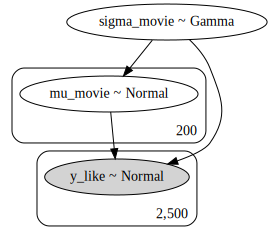

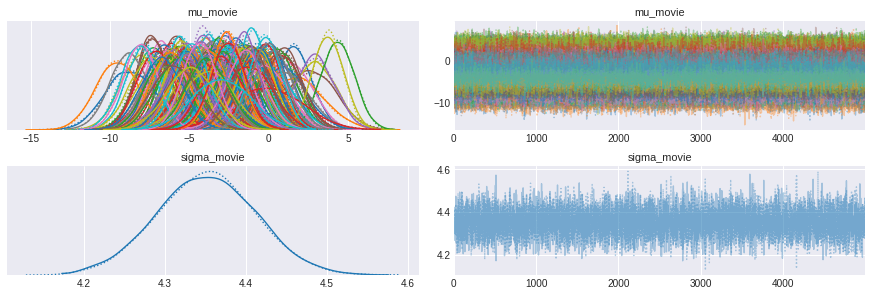

In [99]:
with pm.Model() as basic_model:
  sigma_movie = pm.Gamma('sigma_movie', alpha=10, beta=5)
  mu_movie = pm.Normal('mu_movie', mu=0.0, sigma=sigma_movie, shape=n_movies)

  est = mu_movie[movie_idx]

  y_like = pm.Normal('y_like', mu=est, sigma=sigma_movie, observed=dataframe.like)

  trace = pm.sample(niter, tune=tune_coeff, target_accept=target_accept_coeff)
  summary = pm.summary(trace)
  

  pm.traceplot(trace)
  display(summary)
  summary.to_csv('model_3.csv', encoding='utf-8')

  print("Is sampling correct:",
        len([r_hat for r_hat in summary.r_hat if r_hat == 1])
        == len(summary.r_hat), "based on r_hat")

  print("Worst 3 films based on mean rating", 
        summary.filter(like='mu_movie', axis=0).sort_values(by=["mean"]).head(3))
  
  print("Best 3 films based on mean rating", 
        summary.filter(like='mu_movie', axis=0).sort_values(by=["mean"]).tail(3))

pm.model_to_graphviz(basic_model)

In [145]:
print('Worst films based on simple groupby')
print(dataframe.groupby('movie').mean().sort_values(by = 'like').head(5))

print('Best films based on simple groupby')
print(dataframe.groupby('movie').mean().sort_values(by = 'like').tail(5))

Worst films based on simple groupby
          person  genre       like
movie                             
131    12.500000    3.0 -10.499694
90     15.142857    3.0  -9.970059
137    13.583333    3.0  -9.536700
159    14.285714    0.0  -8.812435
78     10.916667    1.0  -8.777245
Best films based on simple groupby
          person  genre      like
movie                            
55     14.285714    4.0  3.047675
84     12.818182    4.0  3.128029
68     13.555556    2.0  3.196185
158    10.950000    4.0  3.914879
92     12.705882    4.0  4.591327


Summary for sigma and 20 first

In [132]:
model3 = pd.read_csv('model_3.csv')[['Unnamed: 0','mean','sd','hpd_3%','hpd_97%']]
model3_summary = model3.head(20)
model3_summary = model3_summary.append(model3.loc[model3['Unnamed: 0'] == 'sigma_movie'])
model3_summary

,Unnamed: 0,mean,sd,hpd_3%,hpd_97%
0,mu_movie[0],-2.217,1.174,-4.437,-0.020
1,mu_movie[1],-2.832,1.188,-5.035,-0.575
2,mu_movie[2],-1.701,1.213,-3.901,0.643
3,mu_movie[3],-6.516,1.372,-9.109,-3.926
4,mu_movie[4],0.115,1.426,-2.687,2.694
5,mu_movie[5],-5.841,0.992,-7.708,-3.978
6,mu_movie[6],-0.382,1.215,-2.700,1.885
7,mu_movie[7],-0.614,1.178,-2.851,1.540
8,mu_movie[8],-6.900,1.384,-9.517,-4.366
9,mu_movie[9],-3.374,1.045,-5.297,-1.366


Model means

In [128]:
model3_means = pd.read_csv('model_3.csv')[['Unnamed: 0','mean']].head(200)
model3_means.to_csv('model_3_means.csv')
model3_means

,Unnamed: 0,mean
0,mu_movie[0],-2.217
1,mu_movie[1],-2.832
2,mu_movie[2],-1.701
3,mu_movie[3],-6.516
4,mu_movie[4],0.115
5,mu_movie[5],-5.841
6,mu_movie[6],-0.382
7,mu_movie[7],-0.614
8,mu_movie[8],-6.900
9,mu_movie[9],-3.374


# Model 4.0

/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu_genre, mu_person, sigma_genre, sigma_person, mu_movie, sigma_movie]
Sampling chain 1, 0 divergences: 100%|██████████| 6000/6000 [03:38<00:00, 27.49it/s]
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a differen

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_movie[0],1.724,0.937,-0.085,3.412,0.012,0.009,5840.0,5769.0,5837.0,6362.0,1.0
mu_movie[1],-1.288,0.983,-3.162,0.576,0.014,0.010,5214.0,4947.0,5218.0,5536.0,1.0
mu_movie[2],-1.806,1.018,-3.781,0.038,0.014,0.010,5545.0,4922.0,5529.0,5007.0,1.0
mu_movie[3],-1.589,1.063,-3.563,0.404,0.013,0.010,7213.0,6258.0,7182.0,6114.0,1.0
mu_movie[4],-2.361,1.150,-4.580,-0.219,0.014,0.010,6591.0,6286.0,6576.0,6580.0,1.0
mu_movie[5],-0.600,0.898,-2.254,1.097,0.013,0.009,4533.0,4533.0,4537.0,6149.0,1.0
mu_movie[6],0.609,0.981,-1.220,2.458,0.013,0.010,5422.0,4821.0,5420.0,6009.0,1.0
mu_movie[7],-0.070,0.988,-1.987,1.706,0.013,0.009,5488.0,5478.0,5490.0,6656.0,1.0
mu_movie[8],-0.670,1.114,-2.773,1.408,0.013,0.011,7593.0,5248.0,7591.0,6606.0,1.0
mu_movie[9],0.365,0.913,-1.335,2.108,0.014,0.010,4002.0,4002.0,4004.0,5136.0,1.0


Is sampling correct: True based on r_hat
Most popular genre based on likes is              mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
mu_genre[4]  0.27  0.775  -1.238    1.672  ...   919.0     922.0    1734.0    1.0

[1 rows x 11 columns]
Least popular genre based on likes is               mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
mu_genre[3] -4.497  0.747   -5.86   -3.058  ...   786.0     792.0    1127.0    1.0

[1 rows x 11 columns]
Most critical person based on likes is                mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
mu_person[8] -7.273  0.662  -8.517   -6.034  ...   800.0     818.0    1206.0    1.0

[1 rows x 11 columns]


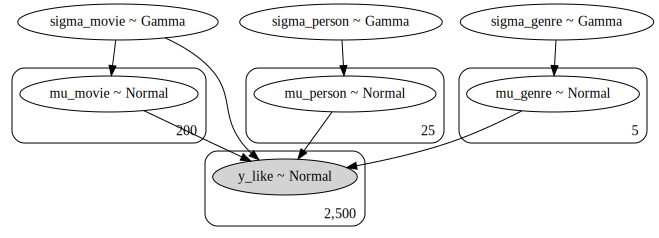

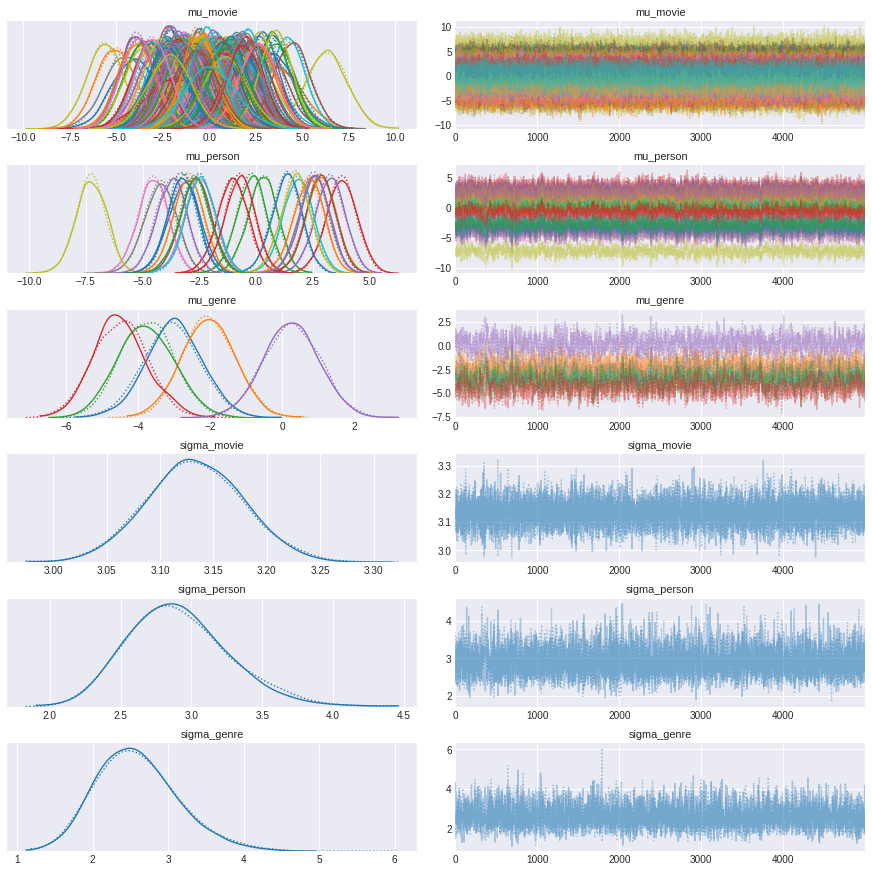

In [100]:
with pm.Model() as intermediate_model:
  sigma_movie = pm.Gamma('sigma_movie', alpha=10, beta=5)
  mu_movie = pm.Normal('mu_movie', mu=0.0, sigma=sigma_movie, shape=n_movies)

  sigma_person = pm.Gamma('sigma_person', alpha=10, beta=5) 
  sigma_genre = pm.Gamma('sigma_genre', alpha=10, beta=5)

  mu_person = pm.Normal('mu_person', mu=0.0, sigma=sigma_person, shape=n_people)
  mu_genre = pm.Normal('mu_genre', mu=0.0, sigma=sigma_genre, shape=n_genres)

  est = mu_movie[movie_idx] + mu_person[person_idx] + mu_genre[genre_idx]

  y_like = pm.Normal('y_like', mu=est, sigma=sigma_movie, observed = dataframe.like)

  trace = pm.sample(niter, tune = tune_coeff, target_accept = target_accept_coeff)
  summary = pm.summary(trace)
  summary.to_csv('model_4.csv', encoding='utf-8')


  pm.traceplot(trace)
  display(summary)

  print(f"Is sampling correct: {len([r_hat for r_hat in summary.r_hat if r_hat == 1]) == len(summary.r_hat)} based on r_hat")

  genres_summary = summary.filter(like='mu_genre', axis=0)

  people_summary = summary.filter(like='mu_person', axis=0)

  # Sorting is ascending therefore head for the worst result
  
  print("Most popular genre based on likes is", genres_summary.sort_values(by = 'mean').tail(1))

  print("Least popular genre based on likes is", genres_summary.sort_values(by = 'mean').head(1))

  print("Most critical person based on likes is", people_summary.sort_values(by = 'mean').head(1))

pm.model_to_graphviz(intermediate_model)

Summary for sigma and 20 first

In [133]:
model4 = pd.read_csv('model_4.csv')[['Unnamed: 0','mean','sd','hpd_3%','hpd_97%']]
model4_summary = model4.head(20)
model4_summary = model4_summary.append(model4.loc[model4['Unnamed: 0'] == 'sigma_movie'])
model4_summary

,Unnamed: 0,mean,sd,hpd_3%,hpd_97%
0,mu_movie[0],1.724,0.937,-0.085,3.412
1,mu_movie[1],-1.288,0.983,-3.162,0.576
2,mu_movie[2],-1.806,1.018,-3.781,0.038
3,mu_movie[3],-1.589,1.063,-3.563,0.404
4,mu_movie[4],-2.361,1.150,-4.580,-0.219
5,mu_movie[5],-0.600,0.898,-2.254,1.097
6,mu_movie[6],0.609,0.981,-1.220,2.458
7,mu_movie[7],-0.070,0.988,-1.987,1.706
8,mu_movie[8],-0.670,1.114,-2.773,1.408
9,mu_movie[9],0.365,0.913,-1.335,2.108


Model means

In [127]:
model4_means = pd.read_csv('model_4.csv')[['Unnamed: 0','mean']].head(200)
model4_means.to_csv('model_4_means.csv')
model4_means

,Unnamed: 0,mean
0,mu_movie[0],1.724
1,mu_movie[1],-1.288
2,mu_movie[2],-1.806
3,mu_movie[3],-1.589
4,mu_movie[4],-2.361
5,mu_movie[5],-0.600
6,mu_movie[6],0.609
7,mu_movie[7],-0.070
8,mu_movie[8],-0.670
9,mu_movie[9],0.365


/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu_genre, mu_person, sigma_genre, sigma_person, mu_movie, sigma_movie]
Sampling chain 1, 0 divergences: 100%|██████████| 6000/6000 [03:40<00:00, 27.27it/s]
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a differen

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_movie[0],0.002,3.100,-5.897,5.743,0.022,0.036,20575.0,3710.0,20557.0,7053.0,1.0
mu_movie[1],-1.299,0.977,-3.201,0.451,0.013,0.009,5325.0,5325.0,5318.0,6395.0,1.0
mu_movie[2],-1.843,1.020,-3.716,0.087,0.015,0.011,4400.0,4400.0,4392.0,6236.0,1.0
mu_movie[3],-1.589,1.083,-3.609,0.491,0.013,0.010,6811.0,6006.0,6806.0,6392.0,1.0
mu_movie[4],-2.403,1.161,-4.494,-0.191,0.015,0.011,5842.0,5397.0,5845.0,5789.0,1.0
mu_movie[5],-0.589,0.886,-2.299,1.008,0.016,0.011,3241.0,3241.0,3239.0,5408.0,1.0
mu_movie[6],0.585,0.971,-1.252,2.364,0.014,0.010,4849.0,4849.0,4840.0,6104.0,1.0
mu_movie[7],-0.107,0.993,-1.997,1.724,0.015,0.011,4258.0,4258.0,4269.0,6228.0,1.0
mu_movie[8],-0.637,1.088,-2.754,1.351,0.013,0.011,6741.0,4980.0,6760.0,4578.0,1.0
mu_movie[9],0.346,0.906,-1.328,2.042,0.014,0.010,4044.0,4044.0,4053.0,5979.0,1.0


Is sampling correct: True based on r_hat
Movie 0 data mean             0.002
sd               3.100
hpd_3%          -5.897
hpd_97%          5.743
mcse_mean        0.022
mcse_sd          0.036
ess_mean     20575.000
ess_sd        3710.000
ess_bulk     20557.000
ess_tail      7053.000
r_hat            1.000
Name: mu_movie[0], dtype: float64


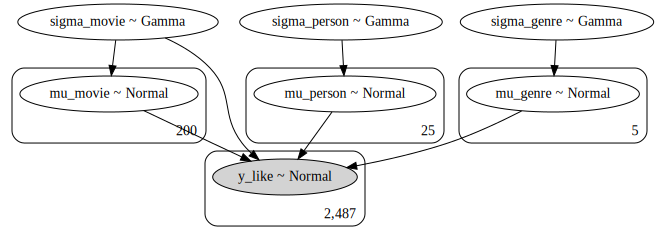

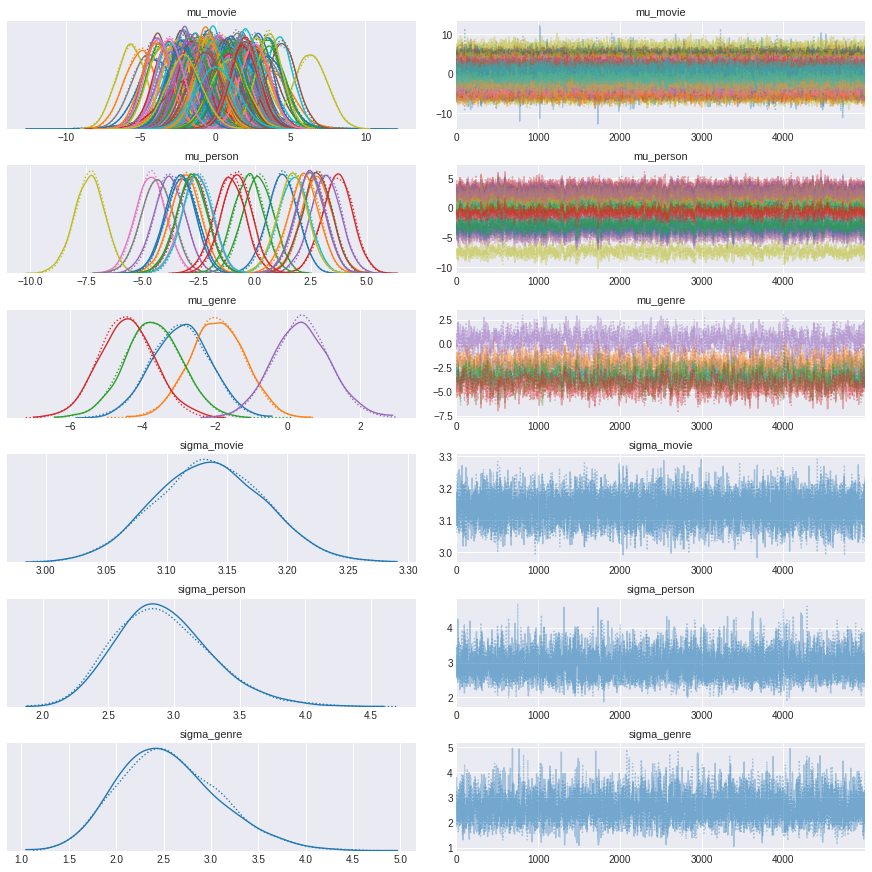

In [140]:
# Delete likes of movie with id 0

is_record_nonrelated_to_movie_0 = dataframe['movie'] != 0

dataframe_deleted = dataframe[is_record_nonrelated_to_movie_0]

dataframe_deleted.shape

movie_idx_new = dataframe_deleted.movie
person_idx_new = dataframe_deleted.person
genre_idx_new = dataframe_deleted.genre

with pm.Model() as intermediate_model_with_delete:
  sigma_movie = pm.Gamma('sigma_movie', alpha=10, beta=5)
  mu_movie = pm.Normal('mu_movie', mu=0.0, sigma=sigma_movie, shape=n_movies)

  sigma_person = pm.Gamma('sigma_person', alpha=10, beta=5) 
  sigma_genre = pm.Gamma('sigma_genre', alpha=10, beta=5)

  mu_person = pm.Normal('mu_person', mu=0.0, sigma=sigma_person, shape=n_people)
  mu_genre = pm.Normal('mu_genre', mu=0.0, sigma=sigma_genre, shape=n_genres)

  est = mu_movie[movie_idx_new] + mu_person[person_idx_new] + mu_genre[genre_idx_new]

  y_like = pm.Normal('y_like', mu=est, sigma=sigma_movie, observed = dataframe_deleted.like)

  trace = pm.sample(niter, tune = tune_coeff, target_accept = target_accept_coeff)
  summary = pm.summary(trace)
  summary.to_csv('model_4_1.csv', encoding='utf-8')


  pm.traceplot(trace)
  display(summary)

  print(f"Is sampling correct: {len([r_hat for r_hat in summary.r_hat if r_hat == 1]) == len(summary.r_hat)} based on r_hat")

  print("Movie 0 data", summary.loc["mu_movie[0]",:])

pm.model_to_graphviz(intermediate_model_with_delete)

Summary for sigma and 20 first

In [154]:
model4_1 = pd.read_csv('model_4_1.csv')[['Unnamed: 0','mean','sd','hpd_3%','hpd_97%']]
model4_1_summary = model4_1.head(20)
model4_1_summary = model4_1_summary.append(model4_1.loc[model4_1['Unnamed: 0'] == 'sigma_movie'])
model4_1_summary

,Unnamed: 0,mean,sd,hpd_3%,hpd_97%
0,mu_movie[0],0.002,3.100,-5.897,5.743
1,mu_movie[1],-1.299,0.977,-3.201,0.451
2,mu_movie[2],-1.843,1.020,-3.716,0.087
3,mu_movie[3],-1.589,1.083,-3.609,0.491
4,mu_movie[4],-2.403,1.161,-4.494,-0.191
5,mu_movie[5],-0.589,0.886,-2.299,1.008
6,mu_movie[6],0.585,0.971,-1.252,2.364
7,mu_movie[7],-0.107,0.993,-1.997,1.724
8,mu_movie[8],-0.637,1.088,-2.754,1.351
9,mu_movie[9],0.346,0.906,-1.328,2.042


Model means

In [142]:
model4_1_means = pd.read_csv('model_4_1.csv')[['Unnamed: 0','mean']].head(200)
model4_1_means.to_csv('model_4_1_means.csv')
model4_1_means

,Unnamed: 0,mean
0,mu_movie[0],0.002
1,mu_movie[1],-1.299
2,mu_movie[2],-1.843
3,mu_movie[3],-1.589
4,mu_movie[4],-2.403
5,mu_movie[5],-0.589
6,mu_movie[6],0.585
7,mu_movie[7],-0.107
8,mu_movie[8],-0.637
9,mu_movie[9],0.346


# Model 5.0

/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu_gp, mu_genre, mu_person, sigma_genre, sigma_person, mu_movie, sigma_movie]
Sampling chain 1, 0 divergences: 100%|██████████| 6000/6000 [09:55<00:00, 10.07it/s]
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a d

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_movie[0],0.880,0.717,-0.437,2.242,0.009,0.006,6955.0,6247.0,6963.0,6459.0,1.0
mu_movie[1],-1.369,0.763,-2.751,0.095,0.009,0.007,6573.0,5969.0,6565.0,5874.0,1.0
mu_movie[2],-1.013,0.763,-2.340,0.518,0.010,0.007,5800.0,5800.0,5836.0,6667.0,1.0
mu_movie[3],-1.347,0.815,-2.942,0.126,0.009,0.007,7631.0,7162.0,7642.0,6590.0,1.0
mu_movie[4],-0.847,0.905,-2.599,0.803,0.010,0.008,8070.0,6207.0,8076.0,6388.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
"mu_gp[4,23]",-0.030,1.222,-2.231,2.291,0.015,0.011,6275.0,6275.0,6276.0,7109.0,1.0
"mu_gp[4,24]",0.047,1.248,-2.251,2.442,0.018,0.013,4765.0,4765.0,4767.0,5931.0,1.0
sigma_movie,2.352,0.034,2.289,2.418,0.000,0.000,16181.0,16181.0,16136.0,7187.0,1.0
sigma_person,2.521,0.166,2.228,2.852,0.002,0.001,11663.0,11478.0,11909.0,8177.0,1.0


Is sampling correct: True based on r_hat


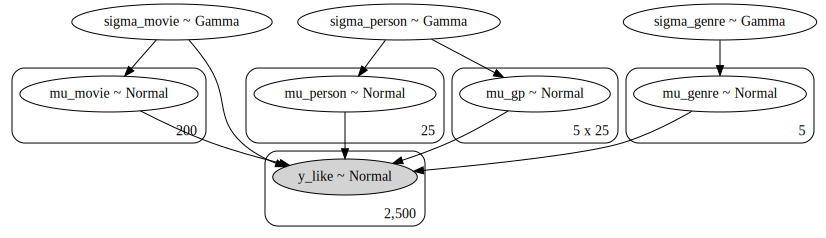

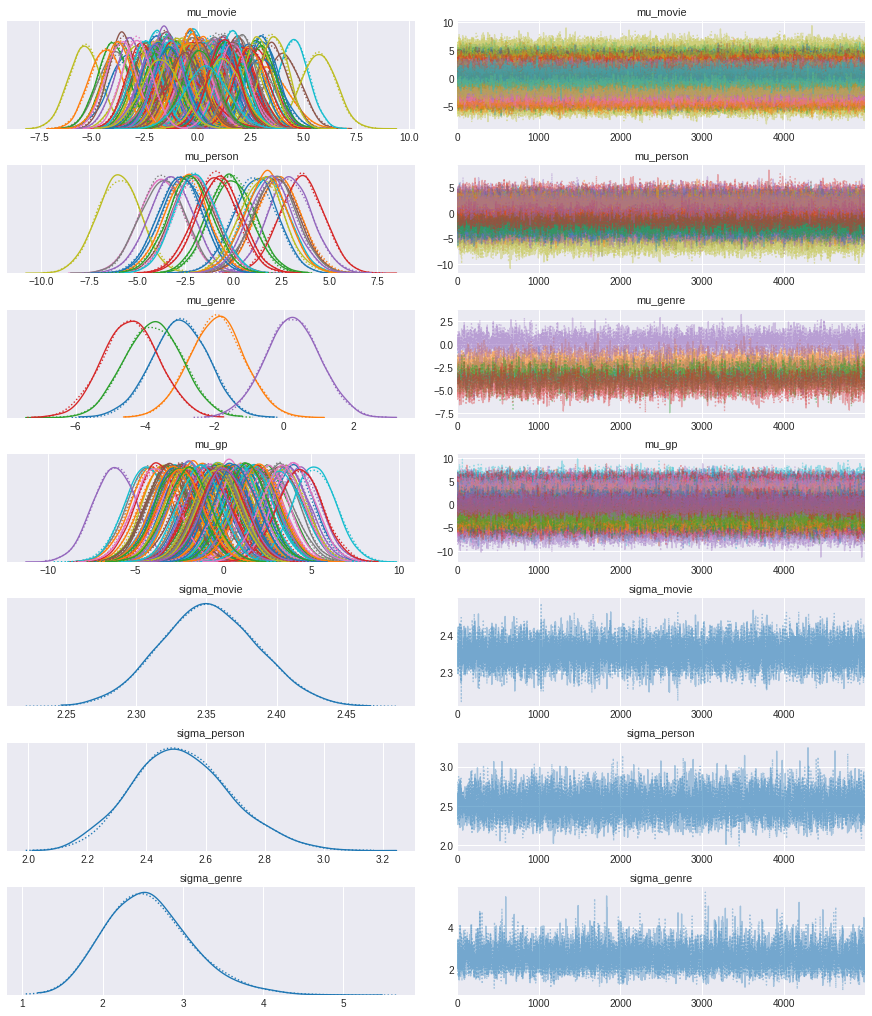

In [136]:
with pm.Model() as advanced_model:
  sigma_movie = pm.Gamma('sigma_movie', alpha=10, beta=5)
  mu_movie = pm.Normal('mu_movie', mu=0.0, sigma=sigma_movie, shape=n_movies)

  sigma_person = pm.Gamma('sigma_person', alpha=10, beta=5) 
  sigma_genre = pm.Gamma('sigma_genre', alpha=10, beta=5)

  mu_person = pm.Normal('mu_person', mu=0.0, sigma=sigma_person, shape=n_people)
  mu_genre = pm.Normal('mu_genre', mu=0.0, sigma=sigma_genre, shape=n_genres)

  mu_gp = pm.Normal('mu_gp', mu=0.0, sigma=sigma_person, shape=(n_genres, n_people))

  est = mu_movie[movie_idx] + mu_person[person_idx] + mu_genre[genre_idx] + mu_gp[genre_idx,person_idx]

  y_like = pm.Normal('y_like', mu=est, sigma=sigma_movie, observed = dataframe.like)

  trace = pm.sample(niter, tune = tune_coeff, target_accept = target_accept_coeff)
  summary = pm.summary(trace)
  summary.to_csv('model_5.csv', encoding='utf-8')

  pm.traceplot(trace)
  display(summary)

  print(f"Is sampling correct: {len([r_hat for r_hat in summary.r_hat if r_hat == 1]) == len(summary.r_hat)} based on r_hat")

pm.model_to_graphviz(advanced_model)

Corelation genre - person

In [153]:
corelation_data = pd.read_csv('model_5.csv').set_index('Unnamed: 0').filter(like = 'mu_gp', axis = 0).sort_values('mean', ascending = False)
corelation_data.head()[['mean','sd']]

,mean,sd
Unnamed: 0,,
"mu_gp[3,4]",5.161,1.221
"mu_gp[4,3]",4.358,1.255
"mu_gp[2,24]",4.251,1.229
"mu_gp[3,21]",4.030,1.180
"mu_gp[3,15]",3.917,1.208


Summary for sigma and 20 first

In [139]:
model5 = pd.read_csv('model_5.csv')[['Unnamed: 0','mean','sd','hpd_3%','hpd_97%']]
model5_summary = model5.head(20)
model5_summary = model5_summary.append(model5.loc[model5['Unnamed: 0'] == 'sigma_movie'])
model5_summary

,Unnamed: 0,mean,sd,hpd_3%,hpd_97%
0,mu_movie[0],0.880,0.717,-0.437,2.242
1,mu_movie[1],-1.369,0.763,-2.751,0.095
2,mu_movie[2],-1.013,0.763,-2.340,0.518
3,mu_movie[3],-1.347,0.815,-2.942,0.126
4,mu_movie[4],-0.847,0.905,-2.599,0.803
5,mu_movie[5],-1.075,0.678,-2.327,0.213
6,mu_movie[6],0.929,0.742,-0.496,2.302
7,mu_movie[7],0.169,0.748,-1.211,1.608
8,mu_movie[8],-0.523,0.817,-2.083,0.995
9,mu_movie[9],0.630,0.690,-0.680,1.912


Model means

In [146]:
model5_means = pd.read_csv('model_5.csv')[['Unnamed: 0','mean']].head(200)
model5_means.to_csv('model_5_means.csv')
model5_means

,Unnamed: 0,mean
0,mu_movie[0],0.880
1,mu_movie[1],-1.369
2,mu_movie[2],-1.013
3,mu_movie[3],-1.347
4,mu_movie[4],-0.847
5,mu_movie[5],-1.075
6,mu_movie[6],0.929
7,mu_movie[7],0.169
8,mu_movie[8],-0.523
9,mu_movie[9],0.630
